In [1]:
from trainer.read_tfrecords import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf

In [2]:
files = tf.io.gfile.listdir('gs://mfccs')
paths = ['gs://mfccs/' + file for file in files]
dataset = load_dataset(paths)


In [3]:
ds_size = sum(1 for _ in dataset)
print('Number of examples', ds_size)

Number of examples 6600


In [4]:
for song in dataset:        
    lenmfcc = int(song[3].numpy()/13)
    if lenmfcc <= 323:
        id_song = song[2].numpy()
        print('id_song',  id_song)
        print(song[0].shape)
        print('lenmfcc', lenmfcc)



In [8]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Valence')
ax.set_ylabel('Arousal')
ax.set_zlabel('Dominance')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

for song in dataset.take(3400):
    vad = song[1].numpy()
    ax.scatter(vad[0], vad[1], vad[2])


IndexError: invalid index to scalar variable.

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Valence')
ax.set_ylabel('Arousal')
ax.set_zlabel('Dominance')

for song in dataset.take(2800):
    vad = song[1].numpy()
    ax.scatter(vad[0], vad[1], vad[2])

In [ ]:
for song in dataset.take(1):
    librosa.display.specshow(song[0].numpy(), x_axis='time')
    plt.colorbar()
    plt.tight_layout()
    plt.title('mfcc')
    plt.show


In [17]:
nrc = pd.read_csv('/dataset/csv_vad/NRC.csv')
print(nrc['Valence'].max())
print(nrc['Arousal'].max())
print(nrc['Dominance'].max())

print(nrc['Valence'].min())
print(nrc['Arousal'].min())
print(nrc['Dominance'].min())

1.0
0.99
0.991
0.0
0.046
0.045


(array([ 3.,  0.,  7., 15., 21., 19., 16., 12.,  5.,  2.]),
 array([0.408376  , 0.43164754, 0.45491907, 0.4781906 , 0.50146216,
        0.52473366, 0.5480052 , 0.5712767 , 0.5945483 , 0.6178198 ,
        0.64109135], dtype=float32),
 <BarContainer object of 10 artists>)

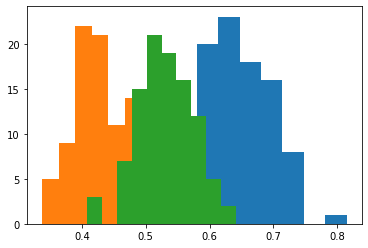

In [14]:
arr1 = []
arr2 = []
arr3 = []
for song in dataset.take(100):
    
    vad = song[1].numpy()
    arr1.append(vad[0])
    arr2.append(vad[1])
    arr3.append(vad[2])
   

plt.hist(arr1)
plt.hist(arr2)
plt.hist(arr3)

In [18]:
for song in dataset.take(2):
    print(song[0])
    print(song[0].shape)
    print(song[1])
    print(song[1].shape)

tf.Tensor(
[[   0.51266277  -13.333972    -52.184418   ... -248.40509
  -249.36194    -259.92618   ]
 [  91.97488     105.46152     130.71811    ...  164.75986
   159.79779     142.65579   ]
 [   4.5364842    13.537308     14.326326   ...  -25.551151
   -26.089361    -27.716387  ]
 ...
 [  -7.3557634    -7.796152    -12.381213   ...   -7.577271
    -9.519638     -8.003055  ]
 [  -3.8517256    -6.1142087    -4.337174   ...  -16.558512
   -15.93455     -13.731273  ]
 [   6.7314157     3.418903      6.5397744  ...   -9.487312
   -10.680588     -6.8253694 ]], shape=(13, 323), dtype=float32)
(13, 323)
tf.Tensor([0.7367468  0.47745013 0.5232302 ], shape=(3,), dtype=float32)
(3,)
tf.Tensor(
[[ -97.86724   -101.346504   -82.07704   ... -148.74692   -155.68216
  -154.57964  ]
 [ 110.93752    101.81677     64.01539   ...  125.48438    128.4621
   128.62988  ]
 [ -28.790775   -29.239456    30.326914  ...  -29.873219   -37.740612
   -37.60441  ]
 ...
 [ -11.215713   -18.37656     -6.3427906 ...   

In [8]:
from google.cloud import storage
storage_client = storage.Client('paula-309109')
bucket = storage_client.get_bucket('mfccs')
#blob = bucket.get_blob('mfccs200_0.tfrecords')